# Importings

### Libraries

In [158]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2
import src.data_preprocessing as dpp
import src.data_transformation as dtf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Datasets

In [248]:
path_raw = './data/raw/'

filenames = {'supplements' : 'liste-des-complements-alimentaires-declares.csv',
             'ingredients' : 'ingredients.csv',
             'plants' : 'plantes.csv',
             'microorganisms' : 'microorganismes.csv',
             'substances' : 'substances.csv',
             'references_nutritionelles' : 'Tables exploitables - RNP_AS.csv'}

# Dataset : Complement alimentaires

In [160]:
df_complements = pd.read_csv(path_raw + filenames['supplements'], sep =';')

print('(num_row, num_cols) = ', df_complements.shape)
df_complements.head()

(num_row, num_cols) =  (96317, 15)


,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
0,CENTELLA extrait 4/1,SYNERVITAL,Gélule,IMPORT EXPORT DISTRI BUSINESS SYSTEM,4 gélules,avec un grand verre d'eau,NaN,NaN,NaN,NaN,Centella asiatica (L.) Urb.,Apiaceae,Feuille,maltodextrine,NaN
1,gingko biloba,labkaps,Gélule,LABKAPS,2 à 3 gélules/jour,NaN,NaN,NaN,NaN,"Allaitement,Enfants (moins de 12 ans),Grossess...",Ginkgo biloba L.,Ginkgoaceae,Feuille,Hydroxypropyl Méthyl Cellulose,"Concentration,Humeur,Mémoire"
2,Grand ortie,NaN,Compte-gouttes,COFFINET MICHAEL,18 gouttes,NaN,NaN,NaN,NaN,"Allaitement,Enfants en bas âge (1 à 3 ans),Gro...",Urtica dioica L.,Urticaceae,Feuille,"E422,Eau potable","Détoxifiant / Draineur,Humeur,Système urinaire"
3,Psyllium noir semence,L'Herbier de Gascogne / Le Comptoir de l'Apoth...,Sachet,L HERBIER DE GASCOGNE,1 à 3 cuillères à café par jour,Prendre une cuillère à café (env. 5 grammes) a...,Ne pas dépasser la dose journalière recommandé...,NaN,NaN,Autre (à préciser),Plantago afra L.,Plantaginaceae,Graine,NaN,Transit
4,Chrysanthellum,NaN,Gélule,ORONALYS SARL,3 gélules par jour,NaN,Ce complément alimentaire doit être utilisé da...,ORO-DIGEST,NaN,"Allaitement,Enfants (moins de 12 ans),Grossesse",Chrysanthellum americanum (L.) Vatke,Compositae,Parties aériennes,"E414,Hydroxypropyl Méthyl Cellulose",NaN


In [161]:
# mask = ['Lactate ferreux' in ing if isinstance(ing,str) else False for ing in df_complements['autres_ingredients']]
# df_complements[mask]

## Missing values

In [162]:
## Missing values
dpp.display_missing_values_counts(df_complements, normalized = True)


----------------------------- 
 Missing Values per Column % 
-----------------------------


NomCommercial             0.0
Marque                   36.0
FormeGalenique            0.0
ResponsableEtiquetage     0.0
DoseJournaliere           0.0
ModeEmploi               22.0
MisesEnGarde             30.0
Gamme                    71.0
Aromes                   89.0
population_a_risques     29.0
plantes                  27.0
familles_plantes         59.0
parties_plantes          59.0
autres_ingredients       12.0
objectif_effet           43.0
dtype: float64

# Uniform Formating

### Lower case all str-type information

In [163]:
df_complements = df_complements.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
df_complements.head()

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
0,centella extrait 4/1,synervital,gélule,import export distri business system,4 gélules,avec un grand verre d'eau,NaN,NaN,NaN,NaN,centella asiatica (l.) urb.,apiaceae,feuille,maltodextrine,NaN
1,gingko biloba,labkaps,gélule,labkaps,2 à 3 gélules/jour,NaN,NaN,NaN,NaN,"allaitement,enfants (moins de 12 ans),grossess...",ginkgo biloba l.,ginkgoaceae,feuille,hydroxypropyl méthyl cellulose,"concentration,humeur,mémoire"
2,grand ortie,NaN,compte-gouttes,coffinet michael,18 gouttes,NaN,NaN,NaN,NaN,"allaitement,enfants en bas âge (1 à 3 ans),gro...",urtica dioica l.,urticaceae,feuille,"e422,eau potable","détoxifiant / draineur,humeur,système urinaire"
3,psyllium noir semence,l'herbier de gascogne / le comptoir de l'apoth...,sachet,l herbier de gascogne,1 à 3 cuillères à café par jour,prendre une cuillère à café (env. 5 grammes) a...,ne pas dépasser la dose journalière recommandé...,NaN,NaN,autre (à préciser),plantago afra l.,plantaginaceae,graine,NaN,transit
4,chrysanthellum,NaN,gélule,oronalys sarl,3 gélules par jour,NaN,ce complément alimentaire doit être utilisé da...,oro-digest,NaN,"allaitement,enfants (moins de 12 ans),grossesse",chrysanthellum americanum (l.) vatke,compositae,parties aériennes,"e414,hydroxypropyl méthyl cellulose",NaN


### Remove redundant double information in a single row
Transform:
* 'objectif_effet': 'solaire,solaire' >>>> 'objectif_effet': 'solaire'
* 'NomCommercial': '\["sun complex", "sun complex"\]' >>>> 'NomCommercial': 'sun complex'

This requires cutting strings by half and removing symbols like : brakets, double quotes, commas

In [164]:
# ex = 295, 654
print("Example Before Replacement: ", df_complements.loc[295,:].to_dict()['NomCommercial'])
print("Example Before Replacement: ", df_complements.loc[654,:].to_dict()['objectif_effet'])
print("Example Before Replacement: ", df_complements.loc[0,:].to_dict()['objectif_effet'])
print("Example Before Replacement: ", df_complements.loc[29,:].to_dict()['NomCommercial'], '\n')

df_complements = df_complements.map(dtf.remove_redundant_information)

print("Example After Replacement: ", df_complements.loc[295,:].to_dict()['NomCommercial'])
print("Example After Replacement: ", df_complements.loc[654,:].to_dict()['objectif_effet'])
print("Example After Replacement: ", df_complements.loc[0,:].to_dict()['objectif_effet'])
print("Example After Replacement: ", df_complements.loc[29,:].to_dict()['NomCommercial'], '\n')

Example Before Replacement:  ["sun complex", "sun complex"]
Example Before Replacement:  sport,sport
Example Before Replacement:  nan
Example Before Replacement:  levure de biére 

Example After Replacement:  sun complex
Example After Replacement:  sport
Example After Replacement:  nan
Example After Replacement:  levure de biére 



### Replace decimal point
From a comma ',' to a dot '.' to avoid confusing with a comma separated item in a list of ingredients.
This requires finding a pattern of number-coma in a string

In [165]:
print("Example Before Replacement: ", df_complements.loc[6575,:].to_dict()['ModeEmploi'])
print("Example Before Replacement: ", df_complements.loc[6575,:].to_dict()['population_a_risques'], '\n')

df_complements = df_complements.map(dtf.replace_decimal_point)

print("Example After Replacement: ", df_complements.loc[6575,:].to_dict()['ModeEmploi'])
print("Example Before Replacement: ", df_complements.loc[6575,:].to_dict()['population_a_risques'])

Example Before Replacement:  5 à 10 g (2/3 de dosette à 1,3 dosette) dans de l’eau
Example Before Replacement:  adolescents (moins de 18 ans),allaitement,enfants (moins de 12 ans),enfants en bas âge (1 à 3 ans),grossesse,nourrissons (moins de 1 an) 

Example After Replacement:  5 à 10 g (2/3 de dosette à 1.3 dosette) dans de l’eau
Example Before Replacement:  adolescents (moins de 18 ans),allaitement,enfants (moins de 12 ans),enfants en bas âge (1 à 3 ans),grossesse,nourrissons (moins de 1 an)


### Replace commas withing parenthesis for semi-colons

In [166]:
# mask = ['(' in s if isinstance(s,str) else False for s in df_complements['parties_plantes']]
# idx = df_complements[mask].index[0]
# print(idx)
# print("Example Before Replacement: ", df_complements.loc[idx,:].to_dict()['parties_plantes'], '\n')

cols = ['plantes', 'autres_ingredients']
df_complements[cols] = df_complements[cols].map(dtf.replace_commas_in_parentheses)

# print("Example Before Replacement: ", df_complements.loc[idx,:].to_dict()['autres_ingredients'], '\n')

## Trivial Duplicates

In [168]:
## Duplicated entries
dpp.display_duplicates_count(df_complements)

## display some duplicates
num_examples = 3
display(df_complements[df_complements.duplicated()].head(num_examples))


-------------------- 
 Duplicated Entries: 818 
--------------------


,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
5634,testofen®,NaN,gélule,kenay gmbh,440 mg,1 gélule par jour.,ne pas dépasser la dose quotidienne recommandé...,NaN,NaN,"adolescents (moins de 18 ans),allaitement,enfa...",trigonella foenum-graecum l.,leguminosae,graine,e460,NaN
6575,glycine,am nutrition,poudre,foenix,10 g,5 à 10 g (2/3 de dosette à 1.3 dosette) dans d...,NaN,NaN,NaN,"adolescents (moins de 18 ans),allaitement,enfa...",NaN,NaN,NaN,glycine,NaN
6845,dynamica,elixirs de provence,flacon,fagot sophie,2 cuillérées à café,pur ou dilué dans de l'eau,NaN,NaN,NaN,"adolescents (moins de 18 ans),allaitement,enfa...","pinus sylvestris l.,satureja montana l.,sambuc...",NaN,NaN,NaN,autre (à préciser)


In [169]:
## Remove trivial duplicates
df_complements.drop_duplicates(inplace=True)

## Explore the presence of Non-Trivial Duplicates
Entries that can be considered as duplicates but that are **NOT identical textual** entries for different reasons.

</br>

### (1) Typos, formatting, information expressed in a different manner, order or structure
Fields having typos or containing the same information in a different order, for autres_ingredients for example, may prevent an easy detection and a more systematic elimination of these duplicates:  

> In the following example the first 2 lines seem to be the same product which is NOT detected easily as duplicated entries since they differ on the 'Aromes' field due to typos ('GREEEN' vs 'GREEN') or different ways of saying the same thing ('POIRE' vs 'SAVEUR POIRE'). All other fields are the same.

In [170]:
dpp.display_example(df_complements, example_type = 'duplicated_but_with_typo')

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,MisesEnGarde,Aromes,autres_ingredients
725,citrulline malate,life pro,poudre,indiex sport nutrition spain sl,5g,produit destiné á être utilisé chez les adulte...,ultra greeen (poire),"l-citrulline malate,e551,arôme naturel,e955,e1..."
726,citrulline malate,life pro,poudre,indiex sport nutrition spain sl,5g,produit destiné á être utilisé chez les adulte...,ultra green (saveur poire),"l-citrulline malate,e551,arôme naturel,e955,e1..."
84621,citrulline malate,life pro,poudre,indiex sport nutrition spain sl,5 g par jour,produit destiné à être utilisé chez les adulte...,fruit punch,"l-citrulline malate,arômes,e551,e955,e162"


### (2) Products differing in the complementary information provided

Products having the same main identifying information such as:   
> ('NomCommercial', 'Marque', 'FormeGalenique', 'DoseJournalier', 'Gamme', 'Aromes', 'plantes', 'famille_plantes', 'parties_plantes', 'autres_ingredients')  

but that contains different information for complementary fields: 
> ('ResponsableEtiquetage', 'ModeEmploi', 'MisesEnGarde', 'population_a_risques', 'objetiff_effet')


In [171]:
## Find some duplicates considering only key fields included in the 'identifying_cols' list:

num_examples = 2

identifying_cols = ['NomCommercial', 'Marque', 'FormeGalenique', 'DoseJournaliere', 'Gamme', 'Aromes']  #,'ResponsableEtiquetage'
identifying_cols_extra = ['plantes','familles_plantes','parties_plantes','autres_ingredients']
identifying_cols.extend(identifying_cols_extra)

## number of duplicates
print("Number of duplicates : ", df_complements.duplicated(subset=identifying_cols).sum(), '\n')

## display example of duplicates
to_drop = df_complements.columns.difference(identifying_cols)
display(df_complements[df_complements.duplicated(subset=identifying_cols)].drop(to_drop, axis=1).head(num_examples))

Number of duplicates :  2079 



,NomCommercial,Marque,FormeGalenique,DoseJournaliere,Gamme,Aromes,plantes,familles_plantes,parties_plantes,autres_ingredients
605,beauté,NaN,capsule,3 capsules,NaN,NaN,"borago officinalis l.,oenothera biennis l.",NaN,NaN,"gélatine,eau purifiée,e422"
1695,hyper'tens,NaN,gélule,2 gélules,NaN,NaN,"crataegus laevigata (poir.) dc.,olea europaea ...",NaN,NaN,"ubiquinone,gelée royale lyophilisée,gélatine"


### (3) Unclear cases with incomplete information
> In the following example the 'marque' is missing, the 'ResponsableEtiquetage' are not the same but the rest of non missing information is the same such as ingredients... then, **is it the same product?, or not?**

In [172]:
text = "Number of Unclear duplicates differing only in 'Responsable Etiquetage' : "
to_exclude = ['ResponsableEtiquetage']
print(text, df_complements.drop(to_exclude, axis=1).duplicated().sum(), '\n')

dpp.display_example(df_complements, example_type = 'duplicated_unclear')

Number of Unclear duplicates differing only in 'Responsable Etiquetage' :  819 



,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
604,beauté,NaN,capsule,pharmacie saint joseph,3 capsules,NaN,NaN,NaN,NaN,NaN,"borago officinalis l.,oenothera biennis l.",NaN,NaN,"gélatine,eau purifiée,e422",NaN
605,beauté,NaN,capsule,pharmacie risse,3 capsules,NaN,NaN,NaN,NaN,NaN,"borago officinalis l.,oenothera biennis l.",NaN,NaN,"gélatine,eau purifiée,e422",NaN
58796,beauté,NaN,capsule,prophar,3 capsules,NaN,NaN,NaN,NaN,NaN,"borago officinalis l.,oenothera biennis l.",NaN,NaN,"gélatine,eau purifiée,e422",NaN


  </br>

### (4) Alarming cases : 
> Same product (in every feature not missing), but different 'Mise en Garde' & 'population a risque'

In [173]:
text = "Number of alarming cases (being identical but differing only in 'Mise en Garde' and 'population a risque') : "
to_exclude = ['MisesEnGarde', 'population_a_risques']

print('\n' + text, df_complements.drop(to_exclude, axis=1).duplicated().sum(), '\n')

df_complements[df_complements.drop(to_exclude, axis=1).duplicated()].head(3)


Number of alarming cases (being identical but differing only in 'Mise en Garde' and 'population a risque') :  307 



,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
4662,neuroboost,NaN,gélule,nutrisolution fr,2 gélules,2 gélules par jour,consultez votre médecin en cas de prise simult...,NaN,NaN,"allaitement,enfants en bas âge (1 à 3 ans),gro...","bacopa monnieri (l.) wettst.,centella asiatica...",NaN,NaN,"hydroxypropyl méthyl cellulose,fibres solubles...","concentration,mémoire"
5451,chrome,well pharma,gélule,objectif pharma,1 gélule,prendre 1 gélule par jour avec un grand verre ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"e460,e464,chlorure de chrome",autre (à préciser)
7933,hydrofta,visufarma,capsule,visufarma,1 capsule/jour,1 capsule par jour,hydrofta contient du bétacarotène . des études...,NaN,NaN,autre (à préciser),"borago officinalis l.,glycine max. (l.) merr.",NaN,NaN,"gélatine,acide l-ascorbique,huile de poisson,e...",œil / vision


In [174]:
# Display single example selected by index:
index = 4662
matches = dpp.display_duplicated_versions(df_complements, to_exclude, index, unpack=True)
display(matches)

Number of matches: 2


MisesEnGarde:
	946: consultez votre médecin en cas de prise simultanée d'anticoagulants antiagrégants plaquettaires. l'emploi est déconseillé chez les femmes enceintes et allaitantes, les diabétiques et les personnes sous antidépresseur. réservé à l'adulte. déconseillé en cas d’épilepsie, ou d’acte interventionnelinvasif programmé.
	4662: consultez votre médecin en cas de prise simultanée d'anticoagulants. l'emploi est déconseillé chez les femmes enceintes et allaitantes, les diabétiques et lespersonnes sous antidépresseur. déconseillé aux enfants de moins de 10 ans.


population_a_risques:
	946: adolescents (moins de 18 ans),allaitement,autre (à préciser),enfants (moins de 12 ans),enfants en bas âge (1 à 3 ans),grossesse,nourrissons (moins de 1 an),sous anticoagulants,sous antidépresseurs,sous antidiabétiques,enfants (de moins de 6 ans),enfants (de moins de 10 ans)
	4662: allaitement,enfants en bas âge (1 à 3 ans),grossesse,nourrissons (moins de 1 an),sous antic

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
946,neuroboost,NaN,gélule,nutrisolution fr,2 gélules,2 gélules par jour,consultez votre médecin en cas de prise simult...,NaN,NaN,"adolescents (moins de 18 ans),allaitement,autr...","bacopa monnieri (l.) wettst.,centella asiatica...",NaN,NaN,"hydroxypropyl méthyl cellulose,fibres solubles...","concentration,mémoire"
4662,neuroboost,NaN,gélule,nutrisolution fr,2 gélules,2 gélules par jour,consultez votre médecin en cas de prise simult...,NaN,NaN,"allaitement,enfants en bas âge (1 à 3 ans),gro...","bacopa monnieri (l.) wettst.,centella asiatica...",NaN,NaN,"hydroxypropyl méthyl cellulose,fibres solubles...","concentration,mémoire"


# Top categories of 'objectif_effect'

In [175]:
df_complements['objectif_effet'].value_counts().head(20)

objectif_effet
autre (à préciser)                     4986
sport                                  4336
immunité                               2884
digestion                              2224
articulations                          2110
sommeil                                1873
détoxifiant / draineur                 1678
peau                                   1648
circulation sanguine et lymphatique    1435
cheveux et ongles                      1159
voies respiratoires                    1011
système urinaire                       1006
antioxydant                             932
humeur                                  847
système nerveux                         846
tonus sexuel                            844
minceur / brûleur                       818
autre (à préciser),immunité             766
artères et cholestérol                  647
transit                                 540
Name: count, dtype: int64

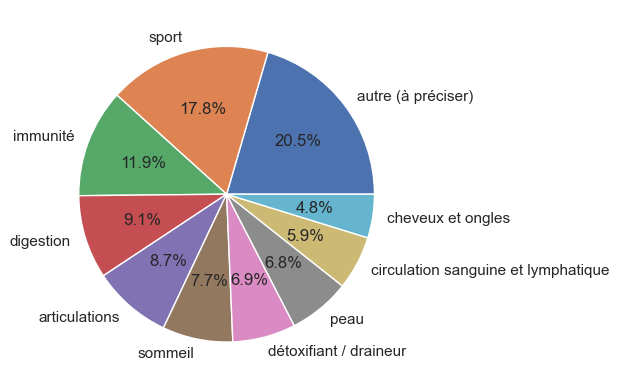

In [176]:
dpp.top_categories_piechart(df_complements, 'objectif_effet', top_n = 10)

## How Many products do not list ingredients ?

In [177]:
text = 'Number of products not listing any ingredient'

def count_products_without_ingredients(df):
    subset = ['plantes','familles_plantes', 'parties_plantes','autres_ingredients']
    amount = df[subset].isna().all(axis=1).sum()
    return amount

amount = count_products_without_ingredients(df_complements)
print(f"\n {text} = {amount} \n")


 Number of products not listing any ingredient = 2228 



In [178]:
# display some examples
subset = ['plantes','familles_plantes', 'parties_plantes','autres_ingredients']
df_complements[df_complements[subset].isna().all(axis=1)].head(3)

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet
8,artichaut - radis noir,juvamine,ampoule,laboratoires juva sante,1 ampoule (soit 10 ml),"prendre 1 ampoule par jour, diluée dans un dem...","ne peut remplacer une alimentation variée, équ...",NaN,NaN,"grossesse,sous traitement pour la thyroïde",NaN,NaN,NaN,NaN,détoxifiant / draineur
110,herbacol bio,NaN,gélule,laboratoires nutrimea,3 gélules,"3 gélules par jour, 1 le matin, 1 le midi et 1...",ne pas administrer concomitamment avec des méd...,NaN,NaN,"allaitement,enfants (moins de 12 ans),grossess...",NaN,NaN,NaN,NaN,transit
166,pulmon'al,laboratoire physiosens,gélule,physioquanta,3 gélules,NaN,demandez conseil à un professionnel de santé e...,NaN,NaN,"adolescents (moins de 18 ans),allaitement,enfa...",NaN,NaN,NaN,NaN,voies respiratoires


In [179]:
## unpack information for a single example (verify that ingredients are not in the other fields)
example_index = 110
df_complements.loc[example_index,:].to_dict()

{'NomCommercial': 'herbacol bio',
 'Marque': nan,
 'FormeGalenique': 'gélule',
 'ResponsableEtiquetage': 'laboratoires nutrimea',
 'DoseJournaliere': '3 gélules',
 'ModeEmploi': '3 gélules par jour, 1 le matin, 1 le midi et 1 le soir, 30 minutes avant chaque repas, avec un verre',
 'MisesEnGarde': 'ne pas administrer concomitamment avec des médicaments. déconseillé aux enfants de moins de 12 ans, aux femmes enceintes et allaitantes. l’usage prolongé est déconseillé.',
 'Gamme': nan,
 'Aromes': nan,
 'population_a_risques': 'allaitement,enfants (moins de 12 ans),grossesse,sous traitement médicamenteux,utilisation prolongée',
 'plantes': nan,
 'familles_plantes': nan,
 'parties_plantes': nan,
 'autres_ingredients': nan,
 'objectif_effet': 'transit'}

#### Items without ingredients, grouped by 'objectif_effet'

In [180]:
grouped_amounts = df_complements.groupby('objectif_effet').apply(count_products_without_ingredients, include_groups=False)
grouped_amounts.sort_values(ascending=False).to_frame(name='number_products_without_ingredients').head(10)

,number_products_without_ingredients
objectif_effet,
autre (à préciser),171
sport,101
immunité,64
digestion,47
articulations,46
cheveux et ongles,44
sommeil,34
peau,34
"autre (à préciser),immunité",34


## ingredients
* It contains the "substances"

In [244]:
df_ingredients = pd.read_csv(path_raw + filenames['ingredients'], header=0)

df_ingredients = df_ingredients.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
df_ingredinets = df_ingredients.map(dtf.replace_decimal_point)
df_ingredinets = df_ingredients.map(dtf.replace_commas_in_parentheses)

df_ingredients.head()

,name,ingredient_type,url,novel_food,synonyms,substances
0,e160e,additif,NaN,False,ß-apocarotenal-8' (c30),NaN
1,e161b,additif,NaN,False,"caroténoïdes mélangés, lutéine, xanthophylles",NaN
2,e162,additif,NaN,False,"bétanine, rouge de betterave",NaN
3,e163,additif,NaN,False,anthocyanes,anthocyanes
4,e170,additif,NaN,False,"carbonate de calcium, craie",NaN


In [217]:
# df_ingredients['name'].isna().sum()

In [218]:
# mask = df_ingredients['substances'].isna()
# df_ingredients[~mask]

## plantes
* Each plant is associated to a "substance"

In [245]:
df_plantes = pd.read_csv(path_raw + filenames['plants'], header=0)

df_plantes = df_plantes.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
df_plantes = df_plantes.map(dtf.replace_decimal_point)
df_plantes = df_plantes.map(dtf.replace_commas_in_parentheses)

df_plantes.head()

,name,plant_family,synonyms,substances,url,novel_food
0,abelmoschus esculentus (l.) moench,malvaceae,NaN,NaN,NaN,False
1,abelmoschus moschatus medik.,malvaceae,NaN,NaN,NaN,False
2,abies alba mill.,pinaceae,"sapin argenté, sapin blanc, sapin pectiné",dérivés terpéniques,NaN,False
3,abies balsamea (l.) mill.,pinaceae,sapin baumier,dérivés terpéniques,NaN,False
4,abies fraseri (pursh) poir.,pinaceae,NaN,NaN,NaN,False


In [235]:
mask = ['lepidilines' in s if isinstance(s,str) else False for s in df_plantes['substances']]
df_plantes[mask].iloc[0,:].to_dict()

{'name': 'lepidium meyenii walp.',
 'plant_family': 'lamiaceae',
 'synonyms': 'maca',
 'substances': 'alcaloïdes imidazoliques, dérivés de la méthyltetra hydrocarboline, lepidilines (a; b et c), macaridine',
 'url': nan,
 'novel_food': False}

## microorganisms

In [246]:
df_microorganismes = pd.read_csv(path_raw + filenames['microorganisms'], header=0)

df_microorganismes = df_microorganismes.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
df_microorganismes = df_microorganismes.map(dtf.replace_decimal_point)
df_microorganismes = df_microorganismes.map(dtf.replace_commas_in_parentheses)

print(df_microorganismes.shape)
df_microorganismes.head()

(91, 4)


,name,synonyms,url,novel_food
0,akkermansia muciniphila,NaN,NaN,True
1,bacillus amyloliquefaciens,NaN,NaN,False
2,bacillus atrophaeus,NaN,NaN,False
3,bacillus clausii,NaN,NaN,False
4,bacillus coagulans,NaN,NaN,False


## substances
* moelcules
* vitamines
* minerals
* others, ex: coquilles de Saint-Jacques

In [247]:
df_substances = pd.read_csv(path_raw + filenames['substances'], header=0)

df_substances = df_substances.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
df_substances = df_substances.map(dtf.replace_decimal_point)
df_substances = df_substances.map(dtf.replace_commas_in_parentheses)

df_substances.head(10)

,name,cas_number,einec_number,public_comments,url,novel_food,unit,must_specify_quantity,nutritional_reference,synonyms
0,polyphénols,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
1,harmane,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
2,monacoline k,NaN,NaN,règlement (ue) 2022/860 modifiant le règlement...,NaN,false,mg,true,NaN,NaN
3,octopamine,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
4,lactones terpéniques,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
5,acide gamma-linolénique,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
6,vinpocétine,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
7,pyrogallol,87-66-1,2017629,NaN,NaN,false,mg,false,NaN,NaN
8,lithospermoside,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN
9,chromones,NaN,NaN,NaN,NaN,false,mg,false,NaN,NaN


## nutritional references 
* values available for certain **substances** only
* values are average values of RNP (Référence Nutritionnelle pour la population) or AS (Apport satisfaisant)

In [249]:
df_ref_nutritionelles = pd.read_csv(path_raw + filenames['references_nutritionelles'])
df_ref_nutritionelles

,Vitamine/Minéral,Homme adulte,Femme adulte,Femme Enceinte,Femme Allaitante
0,Vitamine C,110 mg,110 mg,120 mg,170 mg
1,Vitamine A,750 µg,650 µg,700 µg,1300 µg
2,Calcium,950 mg,950 mg,950 mg,950 mg
3,Fer,11 mg,11 à 16 mg,16 mg,16 mg
4,Vitamine D,15 µg,15 µg,15 µg,15 µg
5,Vitamine B9,330 µg,330 µg,600 µg,500 µg
6,Vitamine B12,4 µg,4 µg,"4,5 µg",5 µg
7,Magnésium,380 mg,300 mg,300 mg,300 mg
8,Sélénium,70 µg,70 µg,70 µg,85 µg
9,Potassium,3500 mg,3500 mg,3500 mg,4000 mg


# Feat engineering : "substances" for each food supplement

In [224]:
# Lookup dictionaries for plant:substances and ingredient:substances
plant_substances = df_plantes.set_index('name')['substances'].to_dict()
ingredient_substances = df_ingredients.set_index('name')['substances'].to_dict()

def gather_substances(row):

    # Get list of plants
    ls_plants = [item.strip() for item in str(row['plantes']).split(',') if item.strip() and item != 'nan']
    
    # Get list of other ingredients
    ls_ingredients = [item.strip() for item in str(row['autres_ingredients']).split(',') if item.strip() and item != 'nan']
    
    # Get all substances from plants and ingredients
    ls_substances = []
    for plant in ls_plants:
        if plant in plant_substances:
            ls_substances.extend(str(plant_substances[plant]).split(','))
    
    for ingredient in ls_ingredients:
        if ingredient in ingredient_substances:
            ls_substances.extend(str(ingredient_substances[ingredient]).split(','))
    
    # Clean and return joined string
    ls_substances = [item.strip() for item in ls_substances if item and item != 'nan']
    return ','.join(ls_substances) if ls_substances else np.nan



# Apply function to process each row
df_complements['substances'] = df_complements.apply(gather_substances,axis=1)

In [225]:
mask = df_complements['substances'].isna()
print(len(df_complements), sum(mask))
df_complements

95499 11255


,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet,substances
0,centella extrait 4/1,synervital,gélule,import export distri business system,4 gélules,avec un grand verre d'eau,NaN,NaN,NaN,NaN,centella asiatica (l.) urb.,apiaceae,feuille,maltodextrine,NaN,NaN
1,gingko biloba,labkaps,gélule,labkaps,2 à 3 gélules/jour,NaN,NaN,NaN,NaN,"allaitement,enfants (moins de 12 ans),grossess...",ginkgo biloba l.,ginkgoaceae,feuille,hydroxypropyl méthyl cellulose,"concentration,humeur,mémoire","acide ginkgolique,glycosides de flavonols,lact..."
2,grand ortie,NaN,compte-gouttes,coffinet michael,18 gouttes,NaN,NaN,NaN,NaN,"allaitement,enfants en bas âge (1 à 3 ans),gro...",urtica dioica l.,urticaceae,feuille,"e422,eau potable","détoxifiant / draineur,humeur,système urinaire",silicium
3,psyllium noir semence,l'herbier de gascogne / le comptoir de l'apoth...,sachet,l herbier de gascogne,1 à 3 cuillères à café par jour,prendre une cuillère à café (env. 5 grammes) a...,ne pas dépasser la dose journalière recommandé...,NaN,NaN,autre (à préciser),plantago afra l.,plantaginaceae,graine,NaN,transit,NaN
4,chrysanthellum,NaN,gélule,oronalys sarl,3 gélules par jour,NaN,ce complément alimentaire doit être utilisé da...,oro-digest,NaN,"allaitement,enfants (moins de 12 ans),grossesse",chrysanthellum americanum (l.) vatke,compositae,parties aériennes,"e414,hydroxypropyl méthyl cellulose",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96312,citrate de potassium,NaN,gélule,sunday natural gmbh,2 gélules,NaN,ne pas dépasser la dose journalière recommandé...,NaN,NaN,"enfants en bas âge (1 à 3 ans),nourrissons (mo...",NaN,NaN,NaN,"citrate de potassium,e464",NaN,potassium
96313,gummies fer,NaN,gomme à mâcher,sunday natural gmbh,2 gommes,NaN,ne pas dépasser la dose journalière recommandé...,NaN,NaN,"autre (à préciser),enfants en bas âge (1 à 3 a...",ribes nigrum l.,grossulariaceae,fruit,"jus de pomme,e440,jus de citron,fibres d''agru...",NaN,"polyphénols,pectines,fer"
96314,bion3 energie,bion3,comprimé,p&g health france sas,1 comprimé,prendre 1 comprimé par jour avec un verre d'ea...,réservé à l'adulte (18+)déconseillé si vous pr...,energie,NaN,"allaitement,grossesse,sous antidiabétiques",panax ginseng c.a.mey.,araliaceae,racine,"acide l-ascorbique,e460,inuline,e341,e464,oxyd...","autre (à préciser),immunité","ginsénosides,vitamine c,inulines,oligofructose..."
96315,collagène repair* skin protect*,NaN,gélule,sunday natural gmbh,4 gélules,NaN,avertissement : réservé à l’adulte. usage prol...,NaN,NaN,"adolescents (moins de 18 ans),allaitement,enfa...","aesculus hippocastanum l.,arctium lappa l.,bam...",NaN,NaN,"e464,l-carnitine l-tartrate,e300,phospholipide...",peau,"aescine,esculine (hétéroside de l'esculétine),..."


#### Which are the substances the most present ?

In [250]:
from collections import Counter

all_substances = []

for substances in df_complements['substances']:
    all_substances.extend([item.strip() for item in str(substances).split(',') if item.strip() and item != 'nan'])

freq_dict = Counter(all_substances)

substance_freq = pd.Series(freq_dict).sort_values(ascending=False)
substance_freq.head(20)

cinéole 1.8       18003
vitamine c        15112
polyphénols       13119
camphre           11418
vitamine b6       10411
zinc               9801
vitamine e         9435
méthyleugénol      9404
flavonoïdes        9318
estragol           9185
magnésium          8701
calcium            8537
caféine            7429
carvacrol          7240
silicium           6468
vitamine b12       6306
vitamine d         6199
furocoumarines     5961
anthocyanes        5490
vitamine b3        5373
dtype: int64

In [252]:
# mono = [subs for subs in set(all_substances) if (len(subs)==3)]
# print(mono)
vits = [subs for subs in set(all_substances) if 'lepidilines' in subs]
print(vits)

['lepidilines (a; b et c)']


In [253]:
# df_substances.columns
# mask = ['cinéole' in s if s else False for s in df_substances['name']]
# df_substances[mask]


df_plantes.columns
mask = ['cinéole' in s if isinstance(s,str) else False for s in df_plantes['substances']]
df_plantes[mask]


# df_ingredients.columns
# mask = ['cinéole' in s if isinstance(s,str) else False for s in df_ingredients['substances']]
# df_ingredients[mask]

,name,plant_family,synonyms,substances,url,novel_food
23,achillea ageratum l.,compositae,NaN,cinéole 1.8,NaN,False
24,achillea atrata l.,compositae,NaN,cinéole 1.8,NaN,False
25,achillea erba-rotta all.,compositae,NaN,"camphre, cinéole 1.8",NaN,False
26,achillea erba-rotta subsp. moschata (wulfen) i...,compositae,NaN,"camphre, cinéole 1.8",NaN,False
28,achillea maritima (l.) ehrend. & y.p.guo,compositae,NaN,"camphre, cinéole 1.8",NaN,False
...,...,...,...,...,...,...
1638,thymus vulgaris l.,lamiaceae,"frigouille, pouilleux, thym commun, thym vrai","camphre, carvacrol, cinéole 1.8, eugénol, lina...",NaN,False
1639,thymus zygis l.,lamiaceae,"thym d'espagne, thym rouge","camphre, carvacrol, cinéole 1.8, thymol",NaN,False
1681,turnera diffusa willd. ex schult.,passifloraceae,damiana,"alcaloïdes oxindoles pentacycliques, alcaloïde...",NaN,False
1754,vitex agnus-castus l.,lamiaceae,"agneau-chaste, arbre au poivre, gattilier","casticine, cinéole 1.8, sabinène",NaN,False


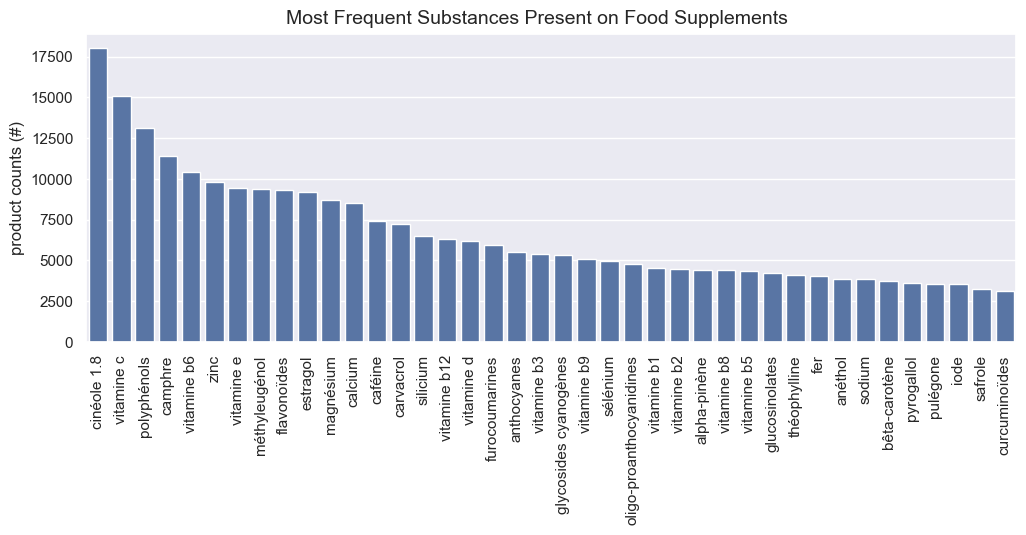

In [267]:
num_ex = 40
keys = substance_freq.head(num_ex).index
vals = substance_freq.head(num_ex).values

fig = plt.figure(figsize=(12,4))
plt.suptitle('Most Frequent Substances Present on Food Supplements', size=14, y=0.94)   
sns.barplot(x=keys, y=vals)

plt.ylabel('product counts (#)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

# Complement Is BIO ?
* infered from name only

In [268]:
def join_columns(row):
    to_join = [str(row['NomCommercial']), str(row['Marque']), str(row['Gamme'])]
    joined_str = ' - '.join(to_join)
    return joined_str



def verify_bio_label(df):

    # join columns into a single auxiliar str column
    df['Nom_Marque_Gamme'] = df.apply(join_columns, axis=1)

    # Define a regex pattern for 'bio' keywords
    bio_labels = r"\b(bio|biologique)\b"      # Match single labels (\b is word boundary)
    
    # Apply regex to create a column to label 'bio' products
    df['is_bio'] = df['Nom_Marque_Gamme'].str.contains(
                                                bio_labels,  # Use the regex pattern
                                                flags=re.IGNORECASE,  # Case insensitive matching
                                                na=False  # Handle NaN gracefully
                                                )    
    
    df.drop('Nom_Marque_Gamme', axis=1, inplace=True)

    return df

# df_test = df_complements.copy()
# df_test[df_test['is_bio']==True].loc[:,['NomCommercial', 'Marque', 'is_bio']]


df_complements = verify_bio_label(df_complements)


C:\Users\19rod\AppData\Local\Temp\ipykernel_22048\796776011.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_bio'] = df['Nom_Marque_Gamme'].str.contains(


In [269]:
df_complements[df_complements['is_bio']==True].loc[:,['NomCommercial','Marque','Gamme','is_bio']].head()

,NomCommercial,Marque,Gamme,is_bio
9,passiflore,prodilab,inovya bio,True
10,force g bio stimulant spray,vitavea santé,force g,True
11,chlorella bio 1.000 mg,vegavero,NaN,True
12,natural b12 bio (aus shiitake),vegavero,NaN,True
35,aloe vera bio extrakt,vegavero,NaN,True


#### Proportion of products identified as 'bio'

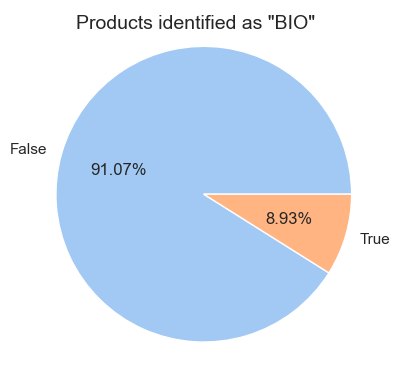

In [270]:
# display(df_complements['is_bio'].value_counts())

#define data
data = df_complements['is_bio'].value_counts(normalize=True).values
labels = df_complements['is_bio'].value_counts(normalize=True).index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.suptitle('Products identified as "BIO"', size=14, y=0.87);   
# plt.title(
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

# Complement Name has quantity specified ? 

In [271]:
def verify_quantity_in_name(df):

    # Match if 
    quantity_pattern = r"\b\d+([.,]?\d+)?\s?(mg|g|kg|µg|mcg|ml|l|oz|lb)\b"
    
    # Apply regex to create a column to label 'bio' products
    df['has_quantity'] = df['NomCommercial'].str.contains(
                                                quantity_pattern,  # Use the regex pattern
                                                flags=re.IGNORECASE,  # Case insensitive matching
                                                na=False  # Handle NaN gracefully
                                                )
    
    return df

In [272]:
df_complements = verify_quantity_in_name(df_complements)

df_complements[df_complements['has_quantity']==True].loc[:,['NomCommercial','FormeGalenique','DoseJournaliere','ModeEmploi','has_quantity','substances']]

C:\Users\19rod\AppData\Local\Temp\ipykernel_22048\3820341966.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_quantity'] = df['NomCommercial'].str.contains(


,NomCommercial,FormeGalenique,DoseJournaliere,ModeEmploi,has_quantity,substances
6,trikatu 300mg,gélule,3 gélules,NaN,True,"gingérol,méthyleugénol,alcaloïdes pipéridiniqu..."
11,chlorella bio 1.000 mg,comprimé,3,prenez 3 comprimés par jour avec suffisamment ...,True,NaN
13,guarana 500 mg singularis superior,capsule,4,NaN,True,"anéthol,caféine,estragol"
38,reishi bio 300 mg,gélule,2 gélule par jour,NaN,True,"vitamine c,bêtaglucanes,ganodériol f,ganoderma..."
91,"gelee royale 2500 mg, ampoules",ampoule,1 ampoule,"le matin de préférence, diluée dans un demi-ve...",True,"miel,acide 10 hydroxydécanoïque,gelée royale"
...,...,...,...,...,...,...
96242,huile d'onagre 500mg + vit e 5mg,capsule,3 capsules,NaN,True,vitamine e
96252,orthosiphon 50mg,gélule,150mg,NaN,True,NaN
96253,e-lyte 118 ml,autre forme liquide (à préciser),adultes: prendre 7.5 ml avec 237 ml d'eau par ...,adultes: prendre 7.5 ml avec 237 ml d'eau par ...,True,"magnésium,sodium,potassium,magnésium,potassium..."
96263,canneberge 36mg de pacs ljdv,gélule,1 gélule par jour,prendre 1 gélule par jour avec un grand verre ...,True,"hydroquinone,oligo-proanthocyanidines"


In [273]:
df_complements['has_quantity'].value_counts(normalize=True)

has_quantity
False    0.963832
True     0.036168
Name: proportion, dtype: float64

# Save dataframe to CSV

### Save dataframe

In [276]:
save = True

path = './data/transformed/'
filename = 'complements-et-substances.csv'

if save:
    df_complements.to_csv(path+filename, index=False)

### Load dataframe

In [549]:
load = False

path = './data/transformed/'
filename = 'complements-et-substances.csv'

if load:
    df_complements = pd.read_csv(path+filename, sep=',')

df_complements.head()

,NomCommercial,Marque,FormeGalenique,ResponsableEtiquetage,DoseJournaliere,ModeEmploi,MisesEnGarde,Gamme,Aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet,substances,is_bio,has_quantity
0,CENTELLA extrait 4/1,SYNERVITAL,Gélule,IMPORT EXPORT DISTRI BUSINESS SYSTEM,4 gélules,avec un grand verre d'eau,NaN,NaN,NaN,NaN,Centella asiatica (L.) Urb.,Apiaceae,Feuille,maltodextrine,NaN,NaN,False,False
1,gingko biloba,labkaps,Gélule,LABKAPS,2 à 3 gélules/jour,NaN,NaN,NaN,NaN,"Allaitement,Enfants (moins de 12 ans),Grossess...",Ginkgo biloba L.,Ginkgoaceae,Feuille,Hydroxypropyl Méthyl Cellulose,"Concentration,Humeur,Mémoire","acide ginkgolique,glycosides de flavonols,lact...",False,False
2,Grand ortie,NaN,Compte-gouttes,COFFINET MICHAEL,18 gouttes,NaN,NaN,NaN,NaN,"Allaitement,Enfants en bas âge (1 à 3 ans),Gro...",Urtica dioica L.,Urticaceae,Feuille,"E422,Eau potable","Détoxifiant / Draineur,Humeur,Système urinaire",silicium,False,False
3,Psyllium noir semence,L'Herbier de Gascogne / Le Comptoir de l'Apoth...,Sachet,L HERBIER DE GASCOGNE,1 à 3 cuillères à café par jour,Prendre une cuillère à café (env. 5 grammes) a...,Ne pas dépasser la dose journalière recommandé...,NaN,NaN,Autre (à préciser),Plantago afra L.,Plantaginaceae,Graine,NaN,Transit,NaN,False,False
4,Chrysanthellum,NaN,Gélule,ORONALYS SARL,3 gélules par jour,NaN,Ce complément alimentaire doit être utilisé da...,ORO-DIGEST,NaN,"Allaitement,Enfants (moins de 12 ans),Grossesse",Chrysanthellum americanum (L.) Vatke,Compositae,Parties aériennes,"E414,Hydroxypropyl Méthyl Cellulose",NaN,NaN,False,False


# Save dataframe to json

In [277]:
save = True

path = './data/transformed/'
filename = 'complements-et-substances.json'


## lower case column names
new_col_names = [name.lower() for name in df_complements.columns]

df_json = df_complements.copy()
df_json.columns = new_col_names

if save:
    df_json.to_json(path+filename, orient = 'split', compression = 'infer', index = 'false')

In [259]:
load = False

path = './data/'
filename = 'complements-et-substances.json'

if load:
    df_fromjson = pd.read_json(path+filename, orient ='split', compression = 'infer')

df_fromjson.head()

,nomcommercial,marque,formegalenique,responsableetiquetage,dosejournaliere,modeemploi,misesengarde,gamme,aromes,population_a_risques,plantes,familles_plantes,parties_plantes,autres_ingredients,objectif_effet,substances,is_bio,has_quantity
0,CENTELLA extrait 4/1,SYNERVITAL,Gélule,IMPORT EXPORT DISTRI BUSINESS SYSTEM,4 gélules,avec un grand verre d'eau,None,None,None,None,Centella asiatica (L.) Urb.,Apiaceae,Feuille,maltodextrine,None,None,False,False
1,gingko biloba,labkaps,Gélule,LABKAPS,2 à 3 gélules/jour,None,None,None,None,"Allaitement,Enfants (moins de 12 ans),Grossess...",Ginkgo biloba L.,Ginkgoaceae,Feuille,Hydroxypropyl Méthyl Cellulose,"Concentration,Humeur,Mémoire","acide ginkgolique,glycosides de flavonols,lact...",False,False
2,Grand ortie,None,Compte-gouttes,COFFINET MICHAEL,18 gouttes,None,None,None,None,"Allaitement,Enfants en bas âge (1 à 3 ans),Gro...",Urtica dioica L.,Urticaceae,Feuille,"E422,Eau potable","Détoxifiant / Draineur,Humeur,Système urinaire",silicium,False,False
3,Psyllium noir semence,L'Herbier de Gascogne / Le Comptoir de l'Apoth...,Sachet,L HERBIER DE GASCOGNE,1 à 3 cuillères à café par jour,Prendre une cuillère à café (env. 5 grammes) a...,Ne pas dépasser la dose journalière recommandé...,None,None,Autre (à préciser),Plantago afra L.,Plantaginaceae,Graine,None,Transit,None,False,False
4,Chrysanthellum,None,Gélule,ORONALYS SARL,3 gélules par jour,None,Ce complément alimentaire doit être utilisé da...,ORO-DIGEST,None,"Allaitement,Enfants (moins de 12 ans),Grossesse",Chrysanthellum americanum (L.) Vatke,Compositae,Parties aériennes,"E414,Hydroxypropyl Méthyl Cellulose",None,None,False,False


In [278]:
df_fromjson.shape

NameError: name 'df_fromjson' is not defined

In [261]:
df_complements.shape

(95518, 17)